In [4]:
import pandas as pd
import networkx as nx
import json

data = pd.read_csv(r"C:\Users\prsanth\Desktop\MAss3\data_scopus.csv")

data=data.fillna(0)
data.head()

Title  Year  \
0  Virtual reality applications for the built env...  2020   
1  Self-tracking while doing sport: Comfort, moti...  2020   
2  Bridge damage: Detection, IFC-based semantic e...  2020   
3  VR system for spatio-temporal visualization of...  2019   
4  DiseaSE: A biomedical text analytics system fo...  2019   

                  EID                                           Abstract  \
0  2-s2.0-85086464158  With its advanced capabilities of immersive an...   
1  2-s2.0-85082875828  The spread of wearable technologies is paving ...   
2  2-s2.0-85078194587  Building Information Modeling (BIM) representa...   
3  2-s2.0-85075706132  Social media analysis is helpful to understand...   
4  2-s2.0-85074886243  Due to increasing volume and unstructured natu...   

             Publisher Conference name Conference date  \
0        Elsevier B.V.               0               0   
1       Academic Press               0               0   
2        Elsevier B.V.               0               0   
3             Springer               0               0   
4  Academic Press Inc.               0               0   

                                             Authors  \
0        Zhang Y., Liu H., Kang S.-C., Al-Hussein M.   
1                               Rapp A., Tirabeni L.   
2  Isailović D., Stojanovic V., Trapp M., Richter...   
3  Okada K., Yoshida M., Itoh T., Czauderna T., S...   
4               Abulaish M., Parwez M.A., Jahiruddin   

                                        Author(s) ID  \
0    57202536919;53984550800;57215426514;6603541102;   
1                           23398572100;57191836654;   
2  57205293410;56421700900;24831175200;3619515940...   
3  57201502480;57171240600;35373203100;2592569550...   
4                6505934038;57202719622;35590173900;   

                           Authors with affiliations  \
0  Zhang, Y., Department of Civil and Environment...   
1  Rapp, A., Computer Science Department, Univers...   
2  Isailović, D., Department for Construction Pro...   
3  Okada, K., Ochanomizu University, Tokyo, Japan...   
4  Abulaish, M., Department of Computer Science, ...   

                                      Source title Abbreviated Source Title  \
0                       Automation in Construction             Autom Constr   
1  International Journal of Human Computer Studies    Int J Hum Comput Stud   
2                       Automation in Construction             Autom Constr   
3                Multimedia Tools and Applications    Multimedia Tools Appl   
4                Journal of Biomedical Informatics   J. Biomed. Informatics   

   Cited by  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [15]:
import networkx as nx
import json


graph = nx.Graph()


for _, row in data.iterrows():
    authors = row['Authors'].split(', ')
    pub_id = row['EID']
    
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            graph.add_edge(authors[i], authors[j], publication=pub_id)


graph_data = nx.readwrite.json_graph.node_link_data(graph)


output_file = "network.json"
with open(output_file, 'w') as f:
    json.dump(graph_data, f, indent=2)

print(f"Graph data successfully saved to: {output_file}")


Graph data successfully saved to: network.json


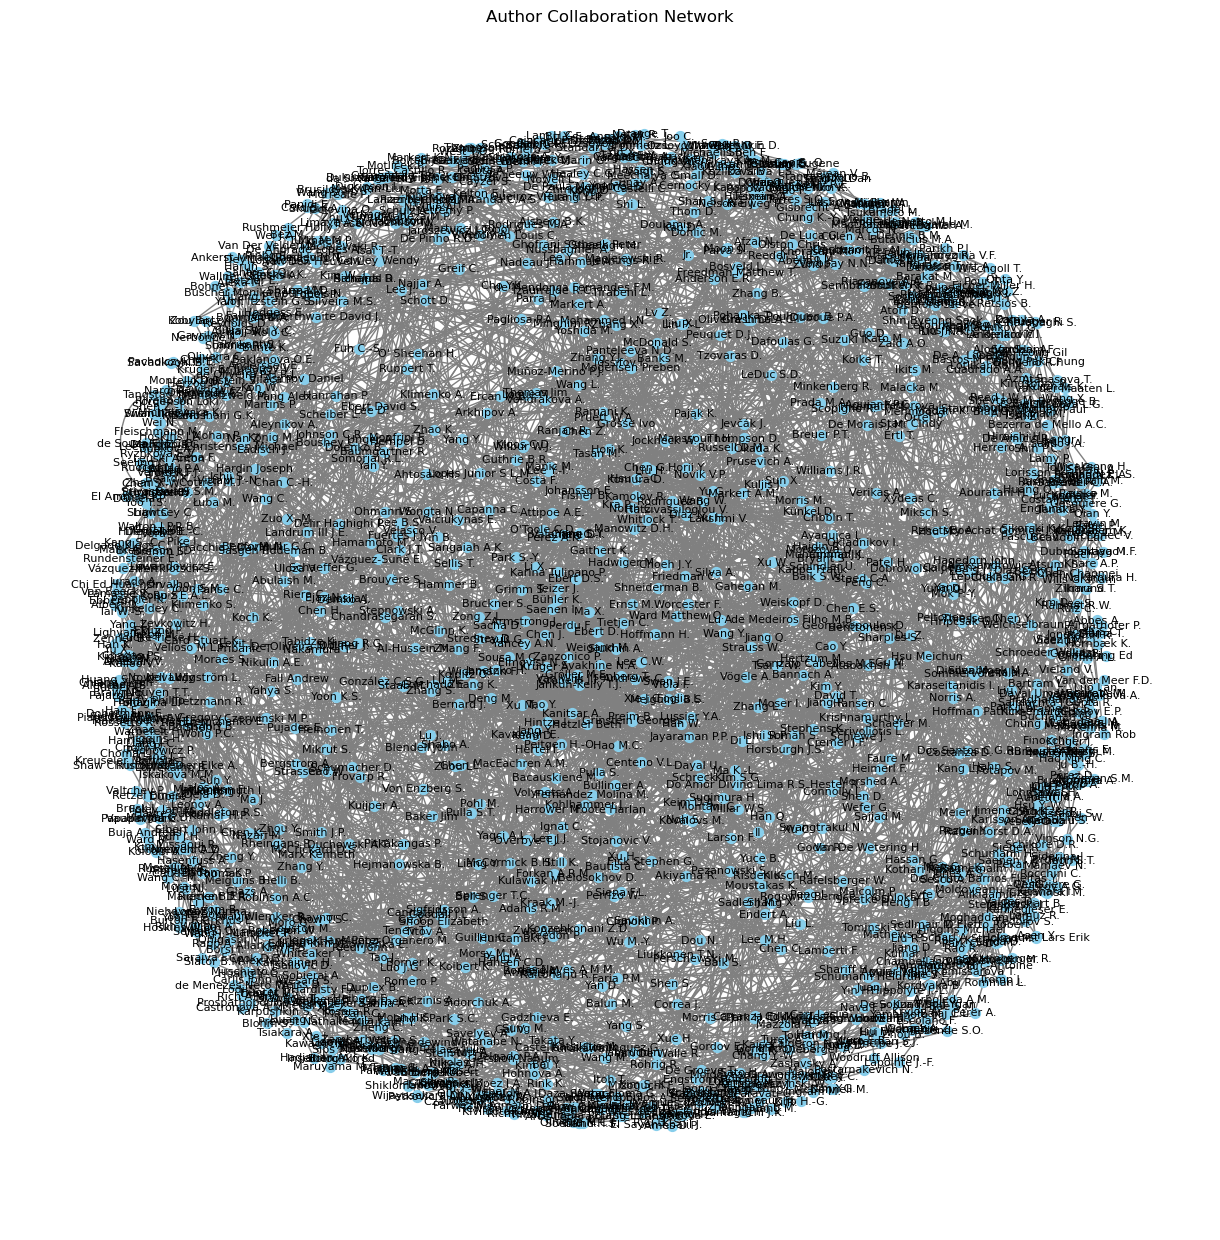

In [16]:
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph
import json
import networkx as nx


with open(r"C:\Users\prsanth\Desktop\Asg3\network.json") as f:
    network_data = json.load(f)



graph = json_graph.node_link_graph(network_data)


plt.figure(figsize=(12, 12))
layout_positions = nx.spring_layout(graph, k=0.5)


nx.draw(
    graph,
    layout_positions,
    with_labels=True,
    node_size=50,
    font_size=8,
    edge_color="gray",
    node_color="skyblue"
)


plt.title("Author Collaboration Network")
plt.show()


In [17]:

data['Affiliation Country'] = data['Authors with affiliations'].apply(
    lambda entry: entry.split(', ')[-1] if entry != 0 else 0
)


top_countries = data['Affiliation Country'].value_counts().head(10).index.tolist()
top_countries


['United States',
 'Germany',
 'United Kingdom',
 'South Korea',
 'China',
 'Canada',
 'Russian Federation',
 'Japan',
 'Brazil',
 'Australia']

In [12]:
import matplotlib.colors as mcolors

# Generate a dictionary to map top countries to colors from the tab10 palette
country_colors = {country: color for country, color in zip(top_countries, plt.cm.tab10.colors)}

# Set a default color for any countries not in the top list
default_color = "#A9A9A9"


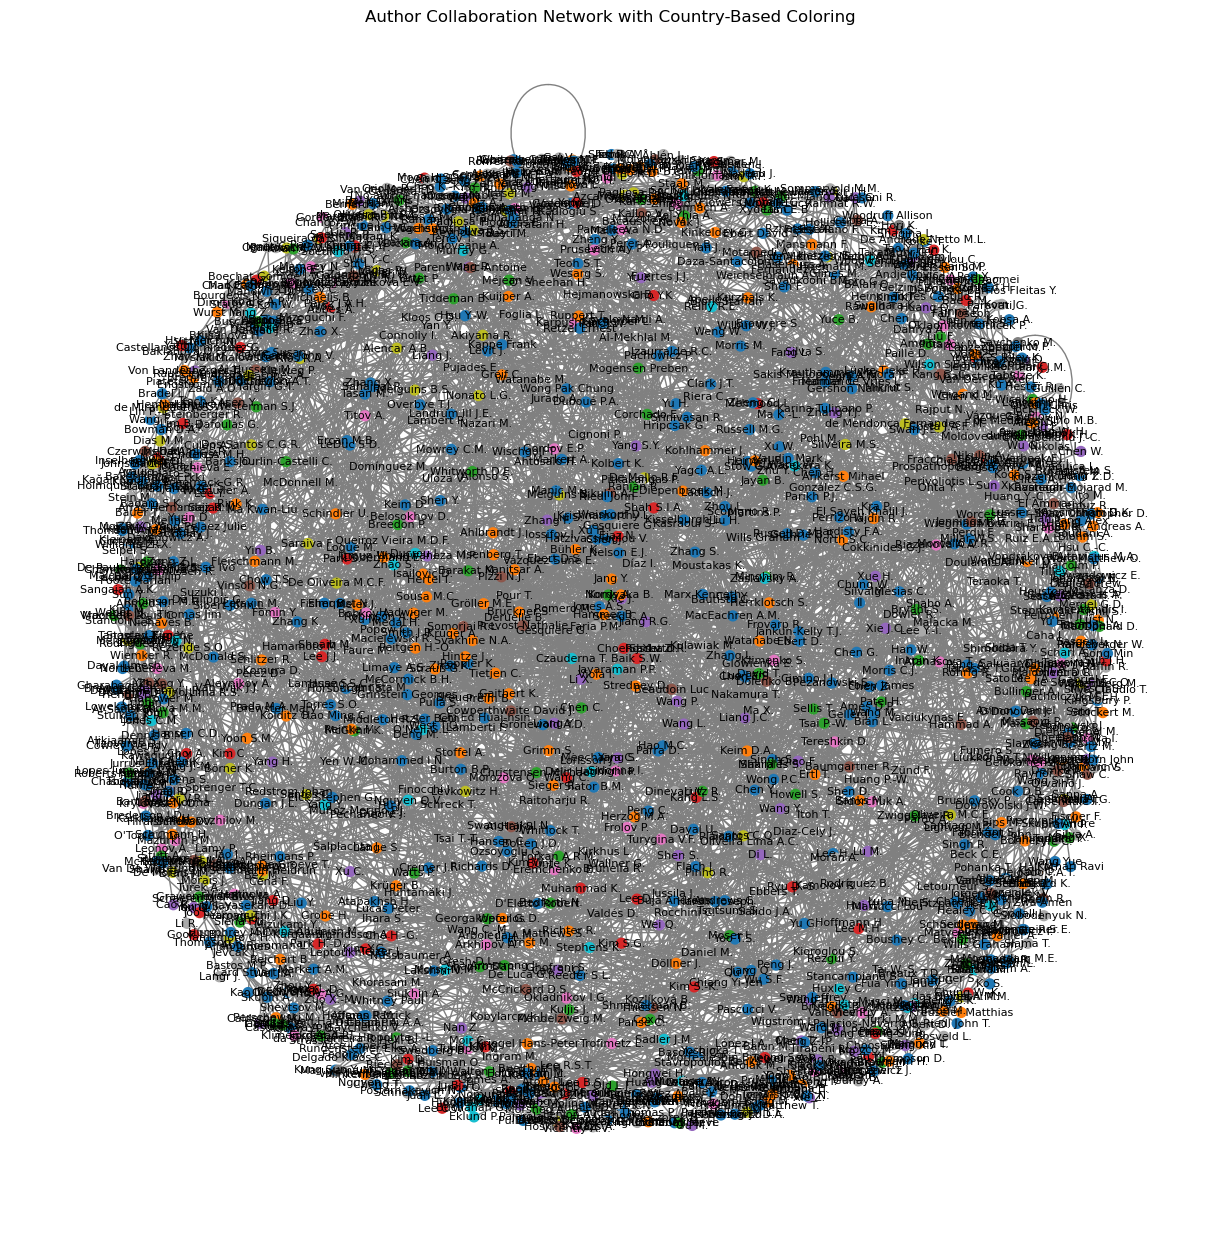

In [18]:
import matplotlib.pyplot as plt
import networkx as nx


color_mapping = {country: color for country, color in zip(top_countries, plt.cm.tab10.colors)}
fallback_color = "#A9A9A9"


graph = nx.Graph()


for _, row in data.iterrows():
    authors = row['Authors'].split(', ')
    publication_id = row['EID']
    affiliation_country = row['Affiliation Country']
    node_color = color_mapping.get(affiliation_country, fallback_color)
    
    
    for author in authors:
        graph.add_node(author, color=node_color)
        
   
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            graph.add_edge(authors[i], authors[j], publication=publication_id)


plt.figure(figsize=(12, 12))
positions = nx.spring_layout(graph, k=0.5)
node_colors = [graph.nodes[author]["color"] for author in graph.nodes]

nx.draw(
    graph,
    positions,
    with_labels=True,
    node_size=50,
    font_size=8,
    edge_color="gray",
    node_color=node_colors
)
plt.title("Author Collaboration Network with Country-Based Coloring")
plt.show()
